# Brain Age Prediction Catboost

In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regressor

In [2]:
import catboost as cb
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class CatBoostRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="CatBoost"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
                
        self.model_ml= cb.CatBoostRegressor
        self.params = {
            'loss_function': 'RMSE',  
            'eval_metric': 'RMSE'  
        }
        
        self.params_space = {
            'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
            'depth': Integer(3, 10),
            'n_estimators': Integer(50, 2000),
            'l2_leaf_reg': Real(1, 20)
        }

c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model = CatBoostRegressor()
Plotters = Plotter()

# Parametros de Plot
colorset = 'Purple'
nameset = 'CatBoost'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=3

#scaler = MinMaxScaler()
Scaler_reg = MinMaxScaler()



In [4]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# DATA

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_CN = f'{path}Brain_Age/Data/CN_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)


df_CN_filtrado = df_CN[(df_CN['Age'] >=20) & (df_CN['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

#Scaler segun algoritmo
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

# Hyperparameter Tuning

In [ ]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


In [6]:
with open(f'results_model/opt_model.pickle', 'rb') as file:
    opt_model= pickle.load(file)

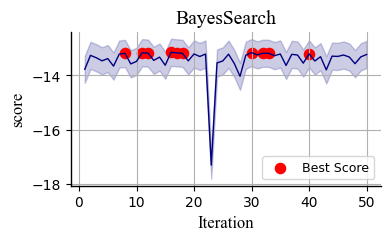

Top 1: Iteration 16, Score -13.14841705150651
Top 2: Iteration 30, Score -13.159449747650758
Top 3: Iteration 11, Score -13.161474658110455
Top 4: Iteration 17, Score -13.168191940929097
Top 5: Iteration 12, Score -13.180230522431973
Top 6: Iteration 32, Score -13.180502389333094
Top 7: Iteration 18, Score -13.187620407537736
Top 8: Iteration 33, Score -13.187685920391425
Top 9: Iteration 8, Score -13.189829358070574
Top 10: Iteration 40, Score -13.20454266717843


In [7]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [8]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.03738053925739689,
  'n_estimators': 1311},
 {'depth': 6,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.022715438350210993,
  'n_estimators': 1444},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.037605076567452496,
  'n_estimators': 1666},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.03543264371579781,
  'n_estimators': 1481},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.017296715711265984,
  'n_estimators': 1620},
 {'depth': 6,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.028064088547455707,
  'n_estimators': 1454},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.03860505970045077,
  'n_estimators': 1263},
 {'depth': 7,
  'l2_leaf_reg': 8.131393965074693,
  'learning_rate': 0.01,
  'n_estimators': 2000},
 {'depth': 7,
  'l2_leaf_reg': 18.48017530230901,
  'learning_rate': 0.05411797281355388,
  'n_estimators': 1683},
 {'depth': 6, 'l2_leaf_reg': 1.0, 'learning_rate': 0.01, 'n_estimat

In [9]:
best_params=opt_model.best_params_

# Training

In [ ]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params,
        scaler=Scaler_reg_train
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, temp_

In [13]:
results_training = [results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test]


In [ ]:
# with open('results_model/results_training.pkl', 'wb') as f:
#     pickle.dump(results_training, f)

In [15]:
with open('results_model/results_training.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test = loaded_results

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     806.6
Date:                Thu, 06 Mar 2025   Prob (F-statistic):          6.80e-139
Time:                        00:06:10   Log-Likelihood:                -4725.9
No. Observations:                1323   AIC:                             9456.
Df Residuals:                    1321   BIC:                             9466.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.4100      0.598     54.176      0.0

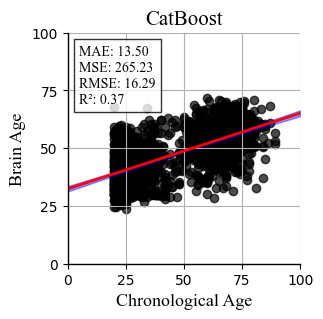

Error medio absoluto: 13.499883162022035
Error cuadrático medio: 265.23128987074034
Raíz del error cuadrático medio: 16.285923058603107
Coeficiente de determinación (R²): 0.37176000679974675


In [16]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

# SHAP

In [ ]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_set
)

In [6]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/multiple_shap_values_CN.pkl', 'rb') as f:
    shap_values_avg_CN = pickle.load(f)


In [7]:
shap_summary_sorted_CN

[('IAF_OCC_left', 2575.472857256995),
 ('IAF_OCC_right', 1884.9386466996834),
 ('Low_subj_spec_EPP_OCC_right', 1881.0270789667445),
 ('High_subj_spec_RPD_CING_right', 1394.5660947970875),
 ('High_subj_spec_EPP_CING_right', 1170.4559218383142),
 ('Low_subj_spec_RPD_CING_right', 1077.0949851099522),
 ('Alpha2_canon_EPP_HPC_left', 799.9961853456755),
 ('Alpha2_canon_RPD_HPC_left', 773.5636929493825),
 ('Alpha2_canon_EPP_PARIET_left', 771.2976574570578),
 ('Low_subj_spec_EPP_PARIET_right', 765.7958696046567),
 ('Low_subj_spec_EPP_PARIET_left', 744.9213734000692),
 ('High_subj_spec_EPP_HPC_left', 708.8867521813371),
 ('Alpha2_canon_RPD_PARIET_left', 678.8001341981925),
 ('Alpha2_canon_RPD_CING_right', 560.5106828284456),
 ('Low_subj_spec_RPD_HPC_left', 524.1493934193007),
 ('High_subj_spec_RPD_HPC_left', 509.22769563807344),
 ('High_subj_spec_RPD_CING_left', 462.8014811824876),
 ('Low_subj_spec_RPD_CING_left', 458.1069697265149),
 ('Alpha2_canon_EPP_HPC_right', 436.4878886435241),
 ('High_s

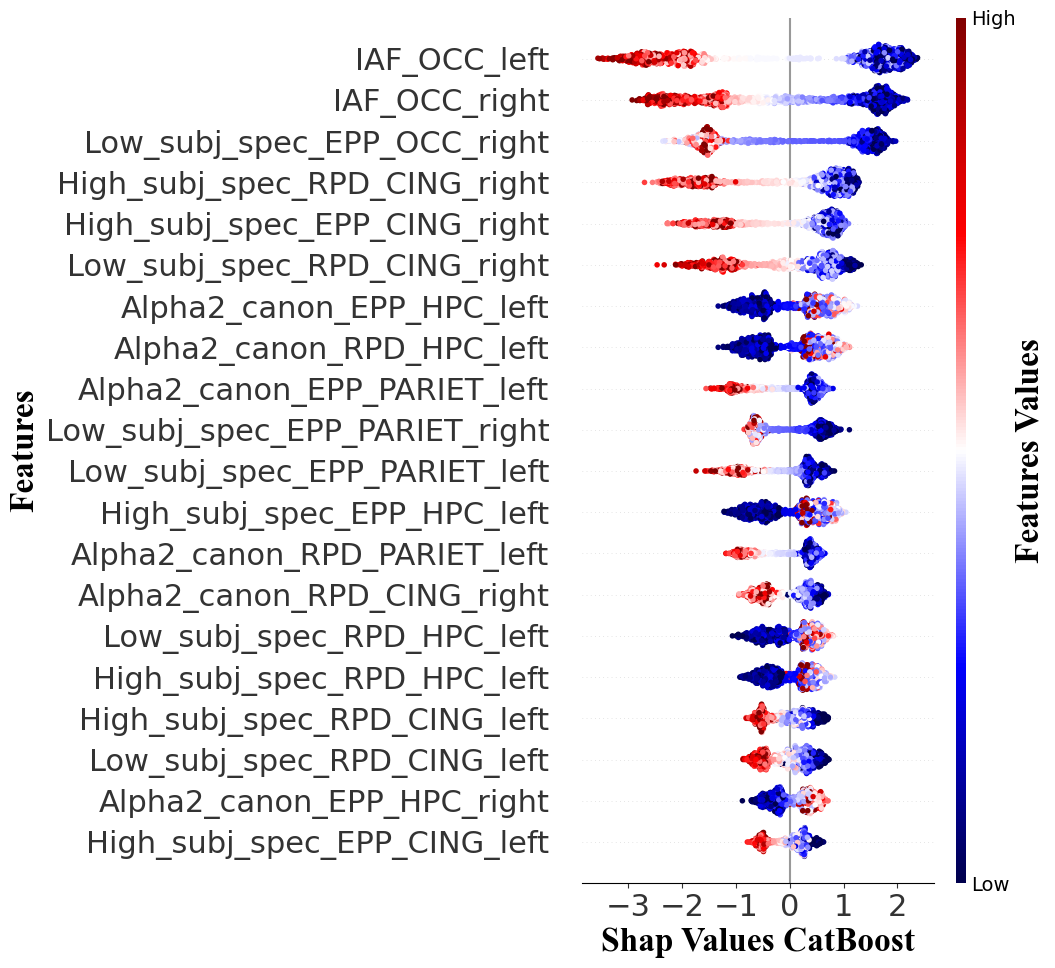

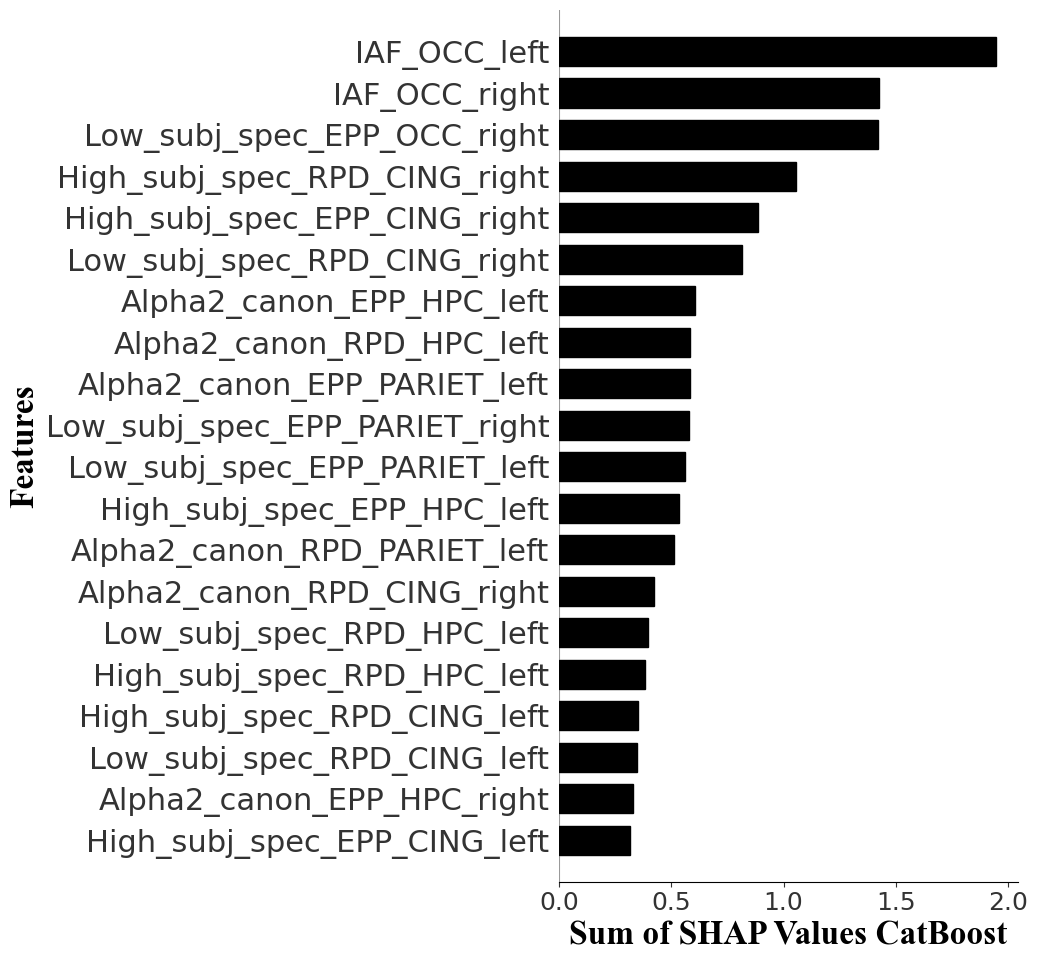

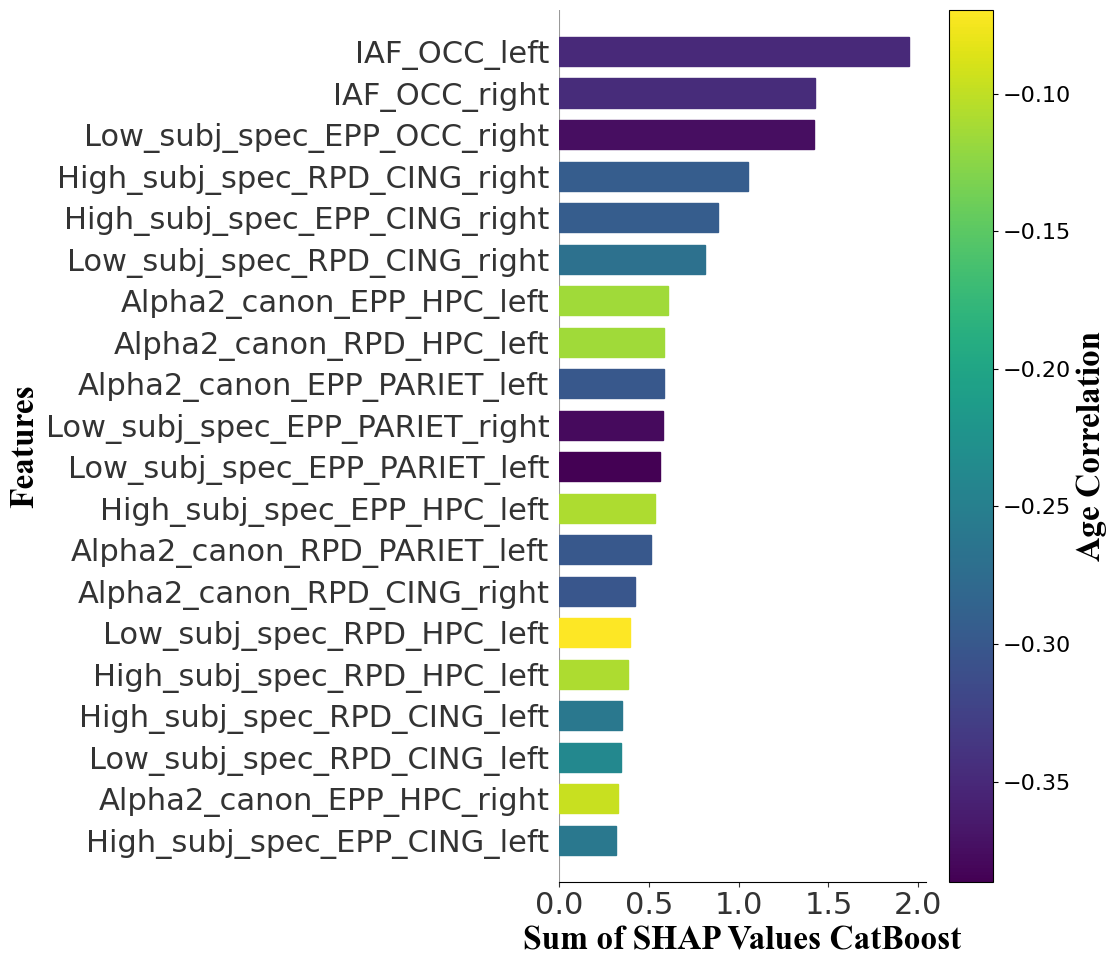

In [20]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [8]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=10)

OCC_right: 1.000000
CING_right: 0.967114
OCC_left: 0.683881
HPC_left: 0.417837
PARIET_left: 0.204807
PARIET_right: 0.203346


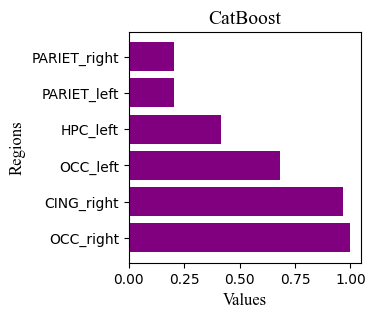

In [9]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


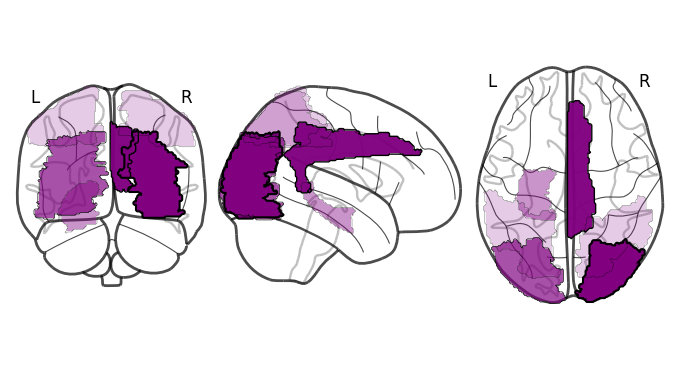

In [10]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)